In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Honors Program/honors/FinBERT

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/FinBERT


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('completed_data_with_topics_and_sentiments.xlsx')

# 获得数据集

In [ ]:
df = pd.read_excel('completed_data_en_with_sentiments.xlsx')

In [ ]:
topics = pd.read_excel('completed_data_with_topics.xlsx')

In [ ]:
df['主题标签'] = topics['主题标签']

In [ ]:
df.head()

,时间,博文内容,内容,英文内容,预测结果,主题标签
0,2017-07-13 15:16:37,"['吃', '奶粉', '孩子', '胖', '奶粉', '中有', '数倍', '母乳',...",吃奶粉的孩子的确更容易胖因为奶粉中有数倍于母乳的脂肪和蛋白质是宝宝不需要的而且会造成体重过量...,It is true that children who eat milk powder a...,negative,-1
1,2017-07-14 12:06:18,['双横臂'],双横臂,Double horizontal Arms,neutral,-1
2,2017-07-14 14:46:46,"['主属', '客户', '证件', '重复', '客户', '合并']",主属客户证件重复客户合并,Main client ID Duplicate client merge,neutral,-1
3,2017-07-14 15:11:15,['撑'],撑,brace,neutral,-1
4,2017-07-14 15:18:05,"['人要', '赚钱', '养家活口', '听', '音乐', '投资', '开车', '玩...",人要赚钱养家活口听音乐投资开车玩手机,People need to earn money to support their fam...,neutral,-1


In [ ]:
df.shape

(191460, 6)

In [ ]:
df.to_excel('completed_data_with_topics_and_sentiments.xlsx', index=False)

In [ ]:
df

,时间,博文内容,内容,英文内容,预测结果,主题标签
0,2017-07-13 15:16:37,"['吃', '奶粉', '孩子', '胖', '奶粉', '中有', '数倍', '母乳',...",吃奶粉的孩子的确更容易胖因为奶粉中有数倍于母乳的脂肪和蛋白质是宝宝不需要的而且会造成体重过量...,It is true that children who eat milk powder a...,negative,-1
1,2017-07-14 12:06:18,['双横臂'],双横臂,Double horizontal Arms,neutral,-1
2,2017-07-14 14:46:46,"['主属', '客户', '证件', '重复', '客户', '合并']",主属客户证件重复客户合并,Main client ID Duplicate client merge,neutral,-1
3,2017-07-14 15:11:15,['撑'],撑,brace,neutral,-1
4,2017-07-14 15:18:05,"['人要', '赚钱', '养家活口', '听', '音乐', '投资', '开车', '玩...",人要赚钱养家活口听音乐投资开车玩手机,People need to earn money to support their fam...,neutral,-1
...,...,...,...,...,...,...
191455,2023-09-24 23:02:44,"['倍量', '山峰', '形态', '用法', '前期', '经历', '一轮', '上涨...",股票超话倍量过山峰的形态用法前期经历一轮上涨形成一个高点形成一个像山峰一样也是形成的压力位经...,The form of the stock over the peak of the usa...,neutral,-1
191456,2023-09-24 23:02:59,"['分时图', '盘升', '信号', '案例', '分析', '假', '顶上', '行'...",股票超话分时图盘升信号案例分析假顶上行趋势未改K线处在回调后向上修复阶段修复能否成功关键在能...,Stock ultra words time-sharing chart up signal...,neutral,-1
191457,2023-09-24 23:03:09,"['周末', '利好', '利空消息', '安静', '如鸡', '双节', '明天', '...",本周末既没有利好也没有利空消息安静如鸡快过双节了明天应该开盘没有惊喜也没有惊吓了基金股票晚安,There is no good or bad news this weekend quie...,neutral,-1
191458,2023-09-24 23:03:45,"['吉宏', '股份', '前', '三季度', '净利润', '同比', '预增吉宏', ...",吉宏股份前三季度净利润同比预增吉宏股份月日晚间发布业绩预告前三季度预计实现净利润亿元亿元比上...,Jihong shares in the first three quarters of n...,positive,3


In [ ]:
# 统计每个主题标签下的正面情绪数量
positive_counts_by_theme = df[df['预测结果'] == 'positive'].groupby('主题标签').size().reset_index(name='正面情绪数量')

# 统计每个主题标签下的中立情绪数量
neutral_counts_by_theme = df[df['预测结果'] == 'neutral'].groupby('主题标签').size().reset_index(name='中立情绪数量')

# 统计每个主题标签下的负面情绪数量
negative_counts_by_theme = df[df['预测结果'] == 'negative'].groupby('主题标签').size().reset_index(name='负面情绪数量')

# 将三个统计结果合并为一个 DataFrame
result_df = pd.merge(pd.merge(positive_counts_by_theme, neutral_counts_by_theme, on='主题标签', how='outer').fillna(0),
                     negative_counts_by_theme, on='主题标签', how='outer').fillna(0)

# 计算每个主题的正面情绪百分比
result_df['正面情绪百分比(%)'] = ((result_df['正面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的中立情绪百分比
result_df['中立情绪百分比(%)'] = ((result_df['中立情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)
# 计算每个主题的负面情绪百分比
result_df['负面情绪百分比(%)'] = ((result_df['负面情绪数量'] / (result_df['正面情绪数量'] + result_df['中立情绪数量'] + result_df['负面情绪数量'])) * 100).round(2)

In [ ]:
selected_data = result_df[result_df['主题标签'].between(-1, 9)]
selected_data

,主题标签,正面情绪数量,中立情绪数量,负面情绪数量,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,-1,13611.0,83180.0,15422.0,12.13,74.13,13.74
1,0,993.0,5687.0,808.0,13.26,75.95,10.79
2,1,153.0,1292.0,123.0,9.76,82.40,7.84
3,2,185.0,1130.0,124.0,12.86,78.53,8.62
4,3,594.0,275.0,216.0,54.75,25.35,19.91
5,4,115.0,612.0,218.0,12.17,64.76,23.07
6,5,44.0,574.0,58.0,6.51,84.91,8.58
7,6,95.0,424.0,94.0,15.50,69.17,15.33
8,7,50.0,471.0,19.0,9.26,87.22,3.52
9,8,50.0,415.0,45.0,9.80,81.37,8.82


# 全部数据分时段

In [ ]:
# result = pd.read_excel('result.xlsx')

In [ ]:
# 将时间列转换为年份和月份的格式
df['年份'] = df['时间'].dt.year
df['月份'] = df['时间'].dt.month

In [ ]:
# 按照年份和月份分组数据，并计算每组的正面、中立和负面情绪数量及百分比
result = df.groupby(['年份', '月份', '预测结果']).size().unstack(fill_value=0).reset_index()
result['总数'] = result['negative'] + result['neutral'] + result['positive']
result['正面情绪百分比(%)'] = ((result['positive'] / result['总数']) * 100).round(2)
result['中立情绪百分比(%)'] = ((result['neutral'] / result['总数']) * 100).round(2)
result['负面情绪百分比(%)'] = ((result['negative'] / result['总数']) * 100).round(2)

In [ ]:
result.to_excel('result.xlsx', index=False)

In [ ]:
result

,年份,月份,negative,neutral,positive,总数,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
0,2017,7,33,229,28,290,9.66,78.97,11.38
1,2017,8,70,562,54,686,7.87,81.92,10.20
2,2017,9,58,480,81,619,13.09,77.54,9.37
3,2017,10,85,359,60,504,11.90,71.23,16.87
4,2017,11,88,492,84,664,12.65,74.10,13.25
...,...,...,...,...,...,...,...,...,...
70,2023,5,1598,11058,1338,13994,9.56,79.02,11.42
71,2023,6,1244,10525,1548,13317,11.62,79.03,9.34
72,2023,7,1322,9684,1465,12471,11.75,77.65,10.60
73,2023,8,1978,12085,1584,15647,10.12,77.24,12.64


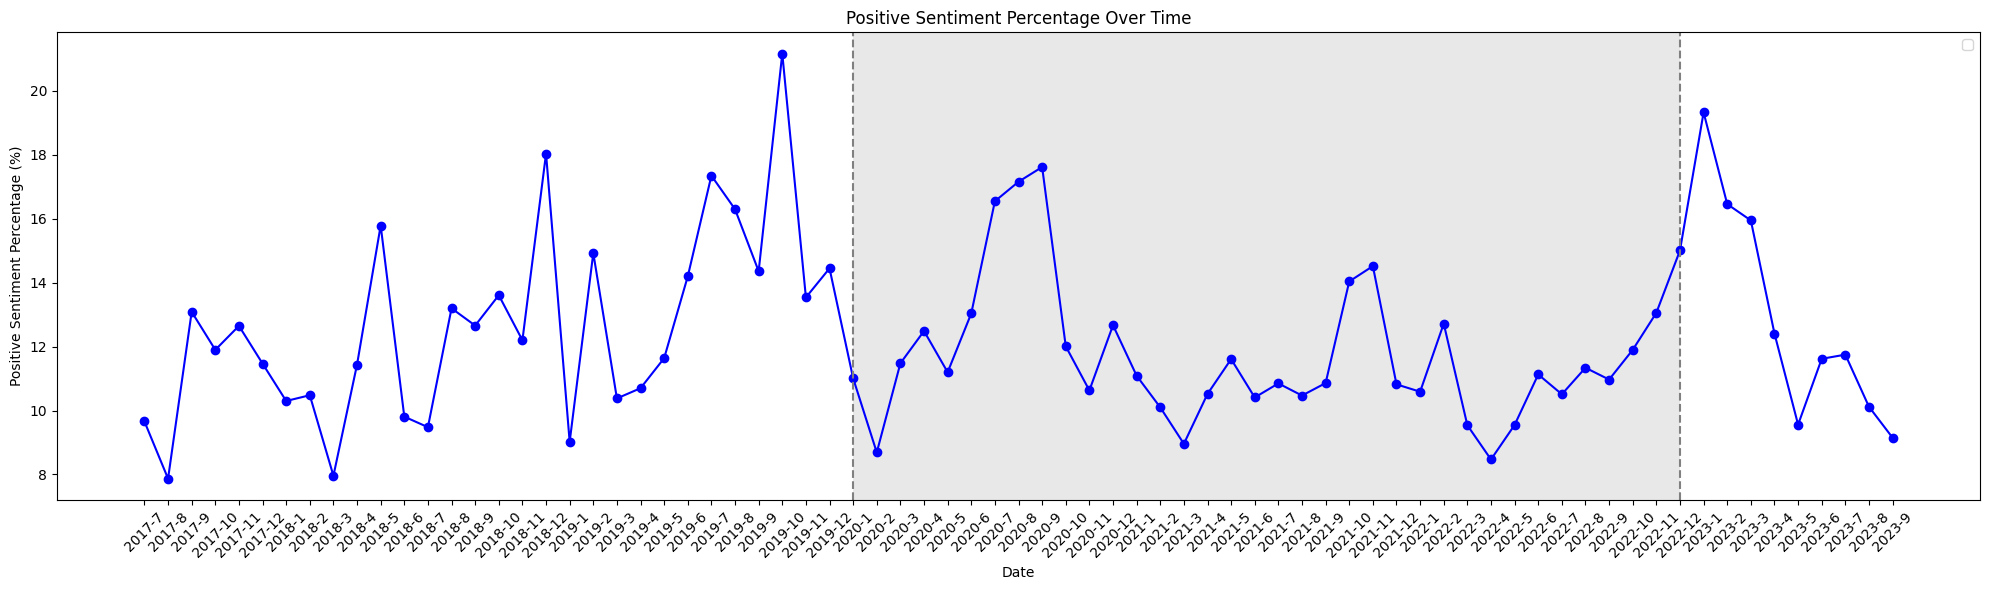

In [ ]:
# 绘制正面情绪百分比随时间变化的折线图
plt.figure(figsize=(20, 6))
plt.plot(result['年份'].astype(str) + '-' + result['月份'].astype(str), result['正面情绪百分比(%)'], marker='o', linestyle='-', color='b')
plt.title('Positive Sentiment Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

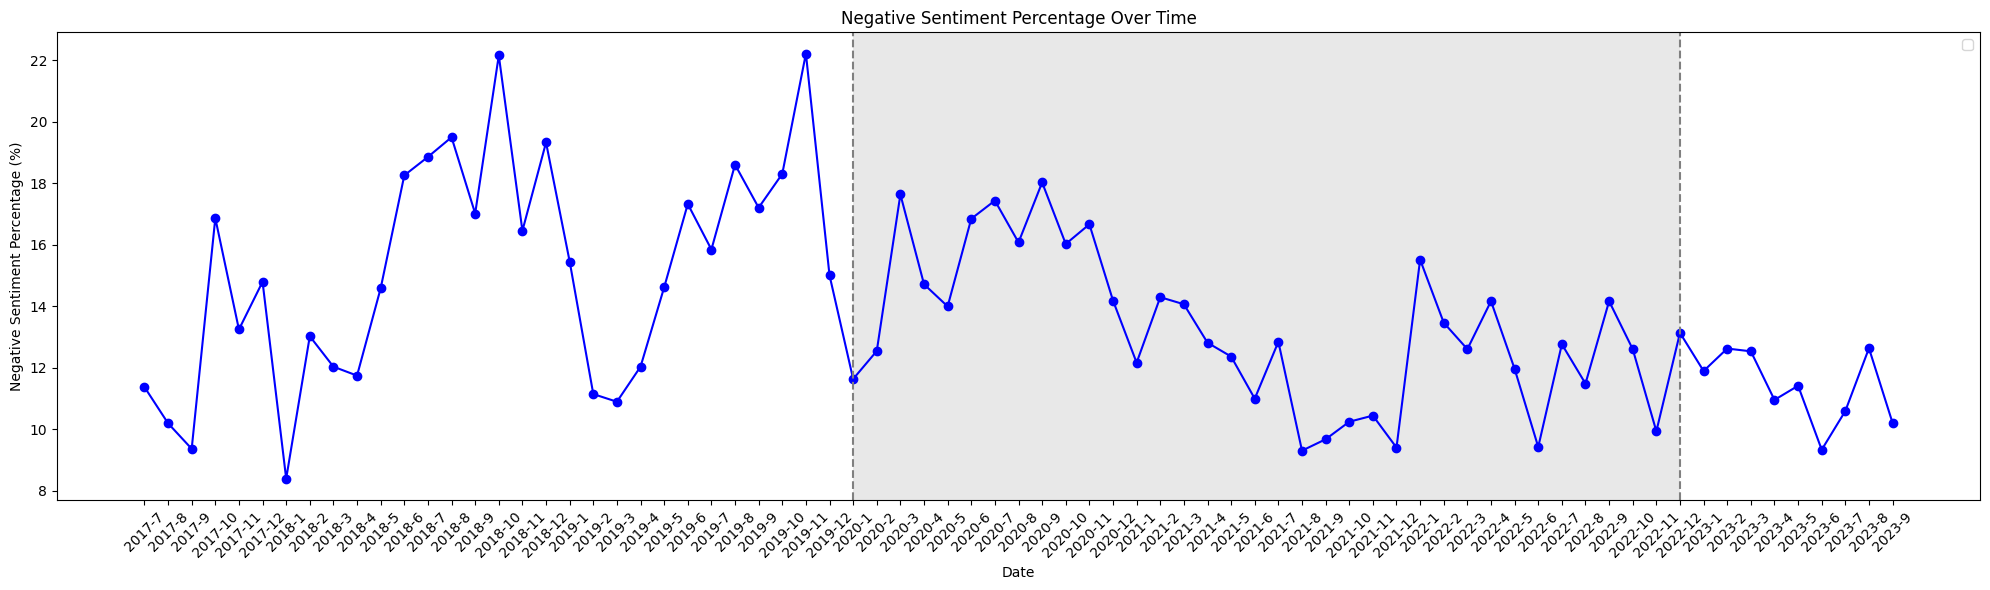

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(result['年份'].astype(str) + '-' + result['月份'].astype(str), result['负面情绪百分比(%)'], marker='o', linestyle='-', color='b')
plt.title('Negative Sentiment Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Percentage (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

# 主题数据分时段

In [ ]:
# result_topics = pd.read_excel('result_topics.xlsx')

In [ ]:
# 将时间列转换为年份和月份的格式
df['年份'] = df['时间'].dt.year
df['月份'] = df['时间'].dt.month

In [ ]:
# 按照年份、月份和主题标签分组数据，并计算每组的正面、中立和负面情绪数量及百分比
result_topics = df.groupby(['年份', '月份', '主题标签', '预测结果']).size().unstack(fill_value=0).reset_index()
result_topics['总数'] = result_topics['negative'] + result_topics['neutral'] + result_topics['positive']
result_topics['正面情绪百分比(%)'] = ((result_topics['positive'] / result_topics['总数']) * 100).round(2)
result_topics['中立情绪百分比(%)'] = ((result_topics['neutral'] / result_topics['总数']) * 100).round(2)
result_topics['负面情绪百分比(%)'] = ((result_topics['negative'] / result_topics['总数']) * 100).round(2)

In [ ]:
result_topics = result_topics[result_topics['主题标签'].between(0, 9)]

In [ ]:
result_topics.to_excel('result_topics.xlsx', index=False)

In [ ]:
result_topics

预测结果,年份,月份,主题标签,negative,neutral,positive,总数,正面情绪百分比(%),中立情绪百分比(%),负面情绪百分比(%)
1,2017,7,0,4,7,0,11,0.00,63.64,36.36
2,2017,7,2,0,1,0,1,0.00,100.00,0.00
3,2017,7,3,0,2,2,4,50.00,50.00,0.00
4,2017,7,4,1,1,0,2,0.00,50.00,50.00
5,2017,7,5,1,0,0,1,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...
24159,2023,9,5,0,7,1,8,12.50,87.50,0.00
24160,2023,9,6,3,18,2,23,8.70,78.26,13.04
24161,2023,9,7,0,1,1,2,50.00,50.00,0.00
24162,2023,9,8,4,14,1,19,5.26,73.68,21.05


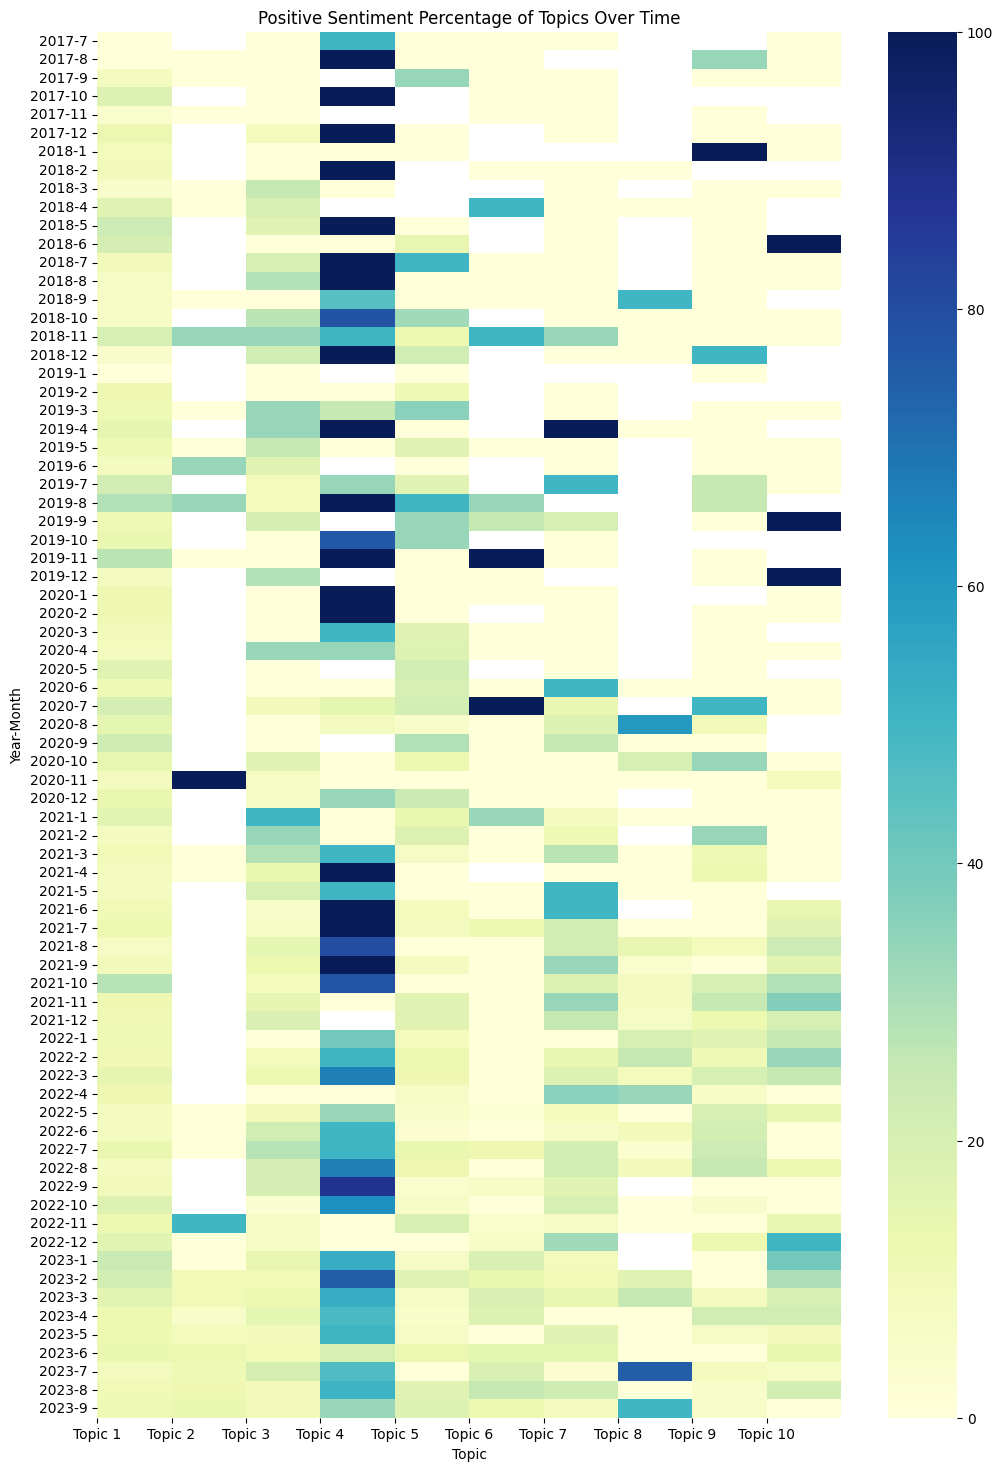

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 重新排列数据以适应热力图
heatmap_data = result_topics.pivot(index=['年份', '月份'], columns='主题标签', values='正面情绪百分比(%)')

# 绘制热力图
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="YlGnBu")

plt.title('Positive Sentiment Percentage by Topics Over Time')
plt.xlabel('Topic')
plt.ylabel('Year-Month')
plt.xticks(ticks=range(10), labels=[f'Topic {i+1}' for i in range(10)])
plt.show()

In [ ]:
labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Technology",
    3: "Revenues",
    4: "Stock Indexes",
    5: "Speculators",
    6: "Past Performance",
    7: "Growth Stock",
    8: "Future Performance",
    9: "Renewable Energy"
}

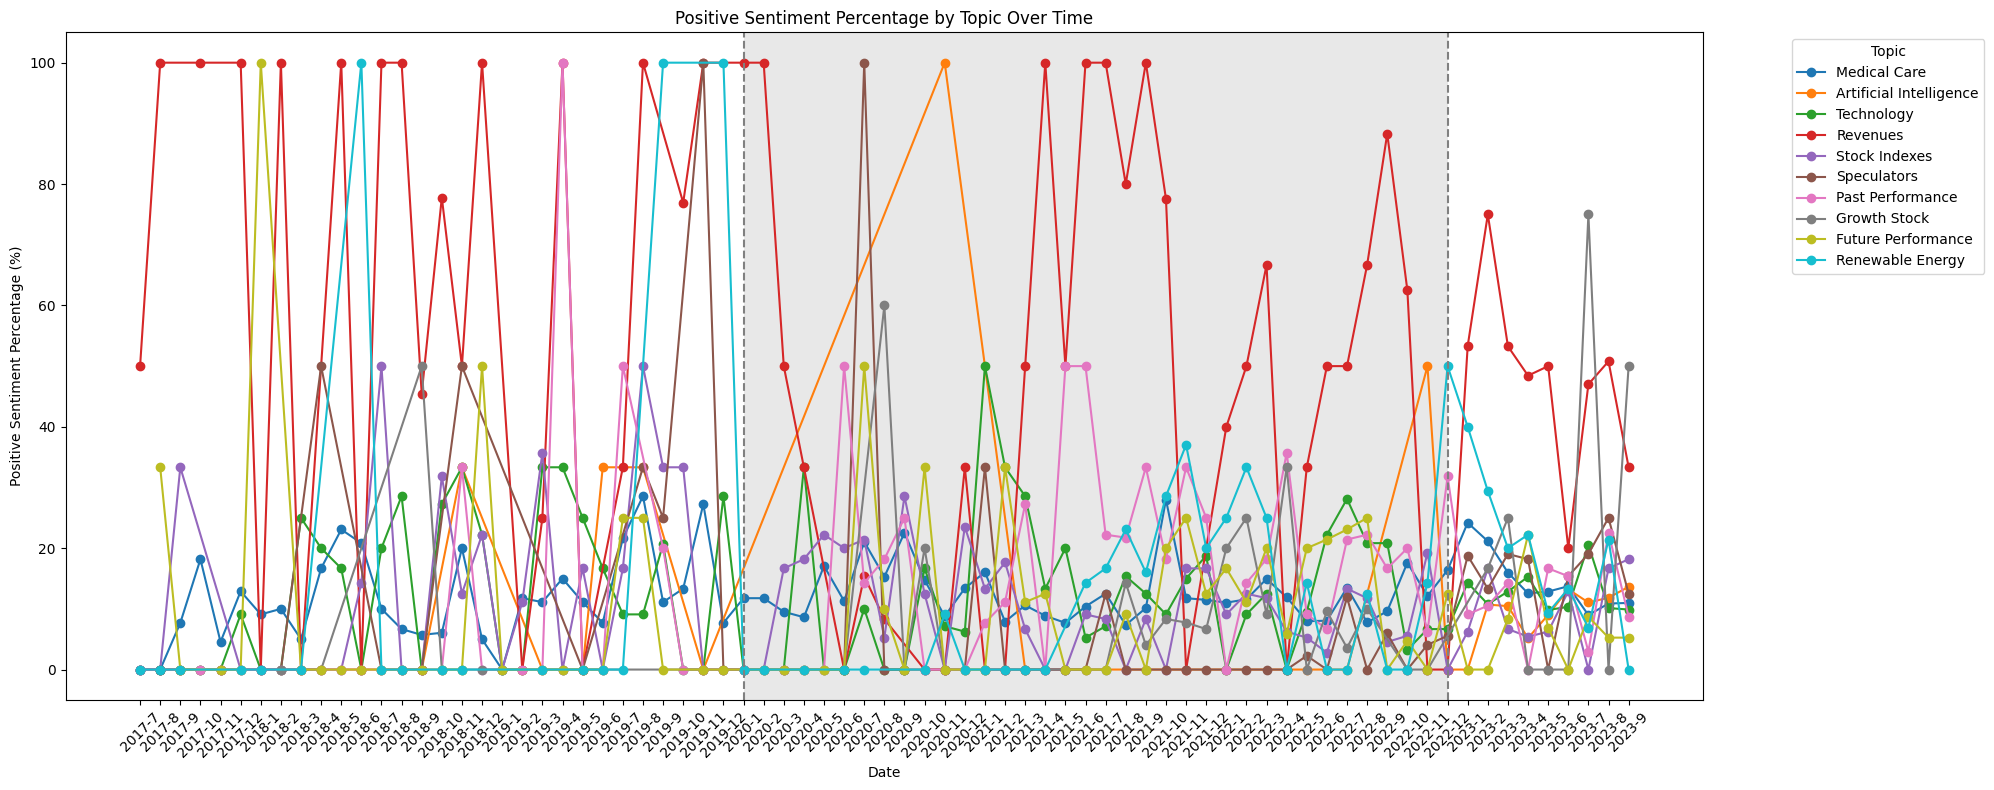

In [ ]:
# 循环绘制每个主题标签的正面情绪百分比随时间变化的折线图
plt.figure(figsize=(20, 8))
for topic in range(0, 10):
    topic_data = result_topics[result_topics['主题标签'] == topic]
    topic_name = labels[topic]
    plt.plot(topic_data['年份'].astype(str) + '-' + topic_data['月份'].astype(str), topic_data['正面情绪百分比(%)'], marker='o', linestyle='-', label=topic_name)

# 设置图形标签和标题
plt.title('Positive Sentiment Percentage by Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Positive Sentiment Percentage (%)')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

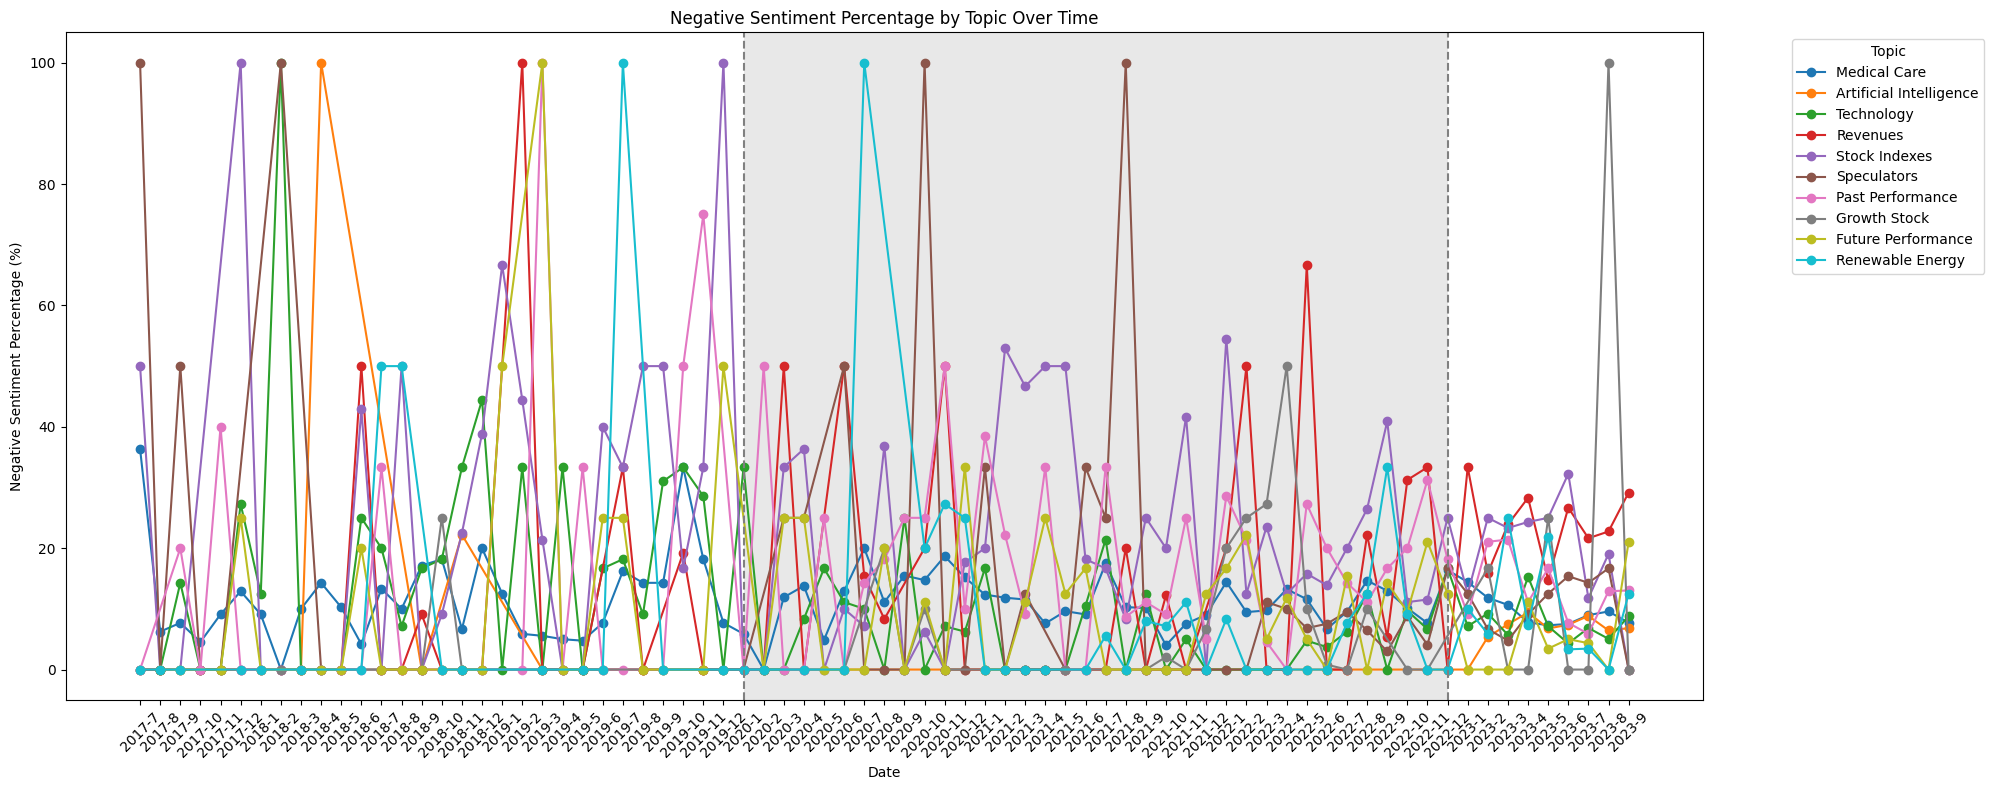

In [ ]:
# 循环绘制每个主题标签的负面情绪百分比随时间变化的折线图
plt.figure(figsize=(20, 8))
for topic in range(0, 10):
    topic_data = result_topics[result_topics['主题标签'] == topic]
    topic_name = labels[topic]
    plt.plot(topic_data['年份'].astype(str) + '-' + topic_data['月份'].astype(str), topic_data['负面情绪百分比(%)'], marker='o', linestyle='-', label=topic_name)

# 设置图形标签和标题
plt.title('Negative Sentiment Percentage by Topic Over Time')
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Percentage (%)')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')

plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

In [ ]:
# 检查 result DataFrame 是否有空值
print("Result DataFrame:")
print(result.isnull().sum())
print()
# 检查 result_topics DataFrame 是否有空值
print("Result_topics DataFrame:")
print(result_topics.isnull().sum())

Result DataFrame:
年份            0
月份            0
negative      0
neutral       0
positive      0
总数            0
正面情绪百分比(%)    0
中立情绪百分比(%)    0
负面情绪百分比(%)    0
dtype: int64

Result_topics DataFrame:
预测结果
年份            0
月份            0
主题标签          0
negative      0
neutral       0
positive      0
总数            0
正面情绪百分比(%)    0
中立情绪百分比(%)    0
负面情绪百分比(%)    0
dtype: int64
